# CP468



In [ ]:
!pip install numpy
!pip install tensorflow
!pip install matplotlib
!pip install -q tensorflow
!pip install scipy

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!pip install kaggle


In [ ]:
import json
import os

# Kaggle API credentials
kaggle_api_key = {
    "username": "bluesss",
    "key": "4183126385b77bd0ab128f399acc26cc"
}

# .kaggle directory
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

# Write the kaggle.json file
with open(os.path.expanduser("~/.kaggle/kaggle.json"), "w") as f:
    json.dump(kaggle_api_key, f)

# Change the permissions of the file
os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)


In [ ]:
!kaggle datasets download -d msambare/fer2013


Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
 98% 59.0M/60.3M [00:00<00:00, 170MB/s]
100% 60.3M/60.3M [00:00<00:00, 149MB/s]


In [ ]:
!kaggle datasets download -d msambare/fer2013


Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
fer2013.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls


fer2013.zip  sample_data


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(7, activation='softmax')  # Assuming 7 types for facial expressions
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 839,047 (3.20 MB)

 Trainable params: 839,047 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:


# Step 1: Download and unzip the dataset
!kaggle datasets download -d msambare/fer2013 -p ./  # Specify download path
!unzip -q ./fer2013.zip -d ./fer2013  # Unzip into fer2013 directory

# Step 2: Imports
import os
import time

# Check Train and Test directories
while not os.path.exists('./fer2013/train') or not os.path.exists('./fer2013/test'):
    time.sleep(1)  # Wait for 1 second and check again

# Step 3: Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0,
    width_shift_range=0,
    height_shift_range=0,
    horizontal_flip=False,
    validation_split=0.1  # Reserve 10% of training data for validation
)

# Load a subset of the datasets for quick testing
train_dataset = train_datagen.flow_from_directory(
    './fer2013/train',
    target_size=(32, 32),  # Smaller image size
    color_mode='grayscale',
    batch_size=16,  # Smaller batch size
    class_mode='categorical',
    subset='training',  # Use only the training subset
    shuffle=True,
    seed=42  # Ensure reproducibility
)

validation_dataset = train_datagen.flow_from_directory(
    './fer2013/train',
    target_size=(32, 32),
    color_mode='grayscale',
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=42
)

# Test data generator without augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

test_dataset = test_datagen.flow_from_directory(
    './fer2013/test',
    target_size=(32, 32),
    color_mode='grayscale',
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

# Step 4: Define the CNN model
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 1)),  # Fewer filters for speed
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),  # Smaller dense layer
    Dense(7, activation='softmax')
])

# Step 5: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Train the model with 1 epoch
history = model.fit(
    train_dataset,
    epochs=1,  # Quick test with 1 epoch
    validation_data=validation_dataset
)

# Step 7: Visualize the training process
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Step 8: Evaluate the model
loss, accuracy = model.evaluate(test_dataset)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Step 9: Save the model
model.save('cnn_facial_recognition_model.h5')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

/usr/local/lib/python3.10/dist-packages/gradio/components/video.py:327: UserWarning: Video does not have browser-compatible container or codec. Converting to mp4.
  warnings.warn(


Found 25841 images belonging to 7 classes.
Found 2868 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x7cbd3c631fc0>
Traceback (most recent call last):
  File "/usr/lib/python3.10/weakref.py", line 370, in remove
    def remove(k, selfref=ref(self)):
KeyboardInterrupt: 


KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3
from tensorflow.keras.layers import Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0,
    width_shift_range=0,
    height_shift_range=0,
    horizontal_flip=False,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load a subset of the datasets for quick testing
train_dataset = train_datagen.flow_from_directory(
    './fer2013/train',
    target_size=(48, 48),
    color_mode='rgb',
    batch_size=16,  # Smaller batch size for quicker iterations
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

validation_dataset = train_datagen.flow_from_directory(
    './fer2013/train',
    target_size=(48, 48),
    color_mode='rgb',
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=42
)

# Create separate datasets for InceptionV3
train_dataset_inception = train_datagen.flow_from_directory(
    './fer2013/train',
    target_size=(75, 75),  # Minimum size for InceptionV3
    color_mode='rgb',
    batch_size=16,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

validation_dataset_inception = train_datagen.flow_from_directory(
    './fer2013/train',
    target_size=(75, 75),
    color_mode='rgb',
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    shuffle=True,
    seed=42
)

test_dataset = test_datagen.flow_from_directory(
    './fer2013/test',
    target_size=(48, 48),  # 48x48 for VGG16 and ResNet50
    color_mode='rgb',
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

test_dataset_inception = test_datagen.flow_from_directory(
    './fer2013/test',
    target_size=(75, 75),  # 75x75 for InceptionV3
    color_mode='rgb',
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

# Helper function to create a model
def create_pretrained_model(base_model, num_classes=7):
    base_model.trainable = False  # Freeze the base model layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(64, activation='relu')(x)  # Reduce dense layer size
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# VGG16 Model
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))
vgg16_model = create_pretrained_model(vgg16_base)

# Compile and train VGG16 model
vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
vgg16_history = vgg16_model.fit(train_dataset, epochs=1, validation_data=validation_dataset)  # Reduced epochs

# ResNet50 Model
resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(48, 48, 3))
resnet50_model = create_pretrained_model(resnet50_base)

# Compile and train ResNet50 model
resnet50_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet50_history = resnet50_model.fit(train_dataset, epochs=1, validation_data=validation_dataset)  # Reduced epochs

# InceptionV3 Model
inceptionv3_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))
inceptionv3_model = create_pretrained_model(inceptionv3_base)

# Compile and train InceptionV3 model
inceptionv3_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
inceptionv3_history = inceptionv3_model.fit(train_dataset_inception, epochs=1, validation_data=validation_dataset_inception)  # Reduced epochs

# Evaluate the models
vgg16_loss, vgg16_accuracy = vgg16_model.evaluate(test_dataset)
print(f"VGG16 Test Accuracy: {vgg16_accuracy*100:.2f}%")

resnet50_loss, resnet50_accuracy = resnet50_model.evaluate(test_dataset)
print(f"ResNet50 Test Accuracy: {resnet50_accuracy*100:.2f}%")

inceptionv3_loss, inceptionv3_accuracy = inceptionv3_model.evaluate(test_dataset_inception)
print(f"InceptionV3 Test Accuracy: {inceptionv3_accuracy*100:.2f}%")



Found 25841 images belonging to 7 classes.
Found 2868 images belonging to 7 classes.
Found 25841 images belonging to 7 classes.
Found 2868 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
1616/1616 ━━━━━━━━━━━━━━━━━━━━ 866s 535ms/step - accuracy: 0.3304 - loss: 1.6902 - val_accuracy: 0.3905 - val_loss: 1.5645
1616/1616 ━━━━━━━━━━━━━━━━━━━━ 370s 222ms/step - accuracy: 0.2320 - loss: 1.8251 - val_accuracy: 0.2566 - val_loss: 1.7673
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1616/1616 ━━━━━━━━━━━━━━━━━━━━ 360s 216ms/step - accuracy: 0.3411 - loss: 1.6890 - val_accuracy: 0.3755 - val_loss: 1.5983
449/449 ━━━━━━━━━━━━━━━━━━━━ 215s 479ms/step - accuracy: 0.3264 - loss: 1.6333
VGG16 Test Accuracy: 39.23%
449/449 ━━━━━━━━━━━━━━━━━━━━ 88s 196ms/step - accuracy: 0.2198 - loss: 1.8192
ResNet50 Test Accuracy: 25.73%
449/449 ━━━━━━━━━━━━━━━━━━━━ 84s 187ms/step - accuracy: 0.3078 - loss: 1.6643
InceptionV3 Test Accuracy: 38.77

In [ ]:
vgg16_loss, vgg16_accuracy = vgg16_model.evaluate(test_dataset)
print(f"VGG16 Test Accuracy: {vgg16_accuracy*100:.2f}%")

449/449 ━━━━━━━━━━━━━━━━━━━━ 216s 481ms/step - accuracy: 0.3264 - loss: 1.6333
VGG16 Test Accuracy: 39.23%


In [ ]:
vgg16_model.save('vgg16_facial_recognition_model.h5')

In [ ]:
# ResNet50 Model
resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(48, 48, 3))
resnet50_model = create_pretrained_model(resnet50_base)
resnet50_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet50_history = resnet50_model.fit(train_dataset, epochs=2, validation_data=test_dataset)
resnet50_loss, resnet50_accuracy = resnet50_model.evaluate(test_dataset)
print(f"ResNet50 Test Accuracy: {resnet50_accuracy*100:.2f}%")
resnet50_model.save('resnet50_facial_recognition_model.h5')

# InceptionV3 Model
inceptionv3_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))
inceptionv3_model = create_pretrained_model(inceptionv3_base)
inceptionv3_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Use train_dataset_inception and validation_dataset_inception for training
inceptionv3_history = inceptionv3_model.fit(train_dataset_inception, epochs=2, validation_data=validation_dataset_inception)
inceptionv3_loss, inceptionv3_accuracy = inceptionv3_model.evaluate(test_dataset_inception) # Evaluate with test_dataset_inception
print(f"InceptionV3 Test Accuracy: {inceptionv3_accuracy*100:.2f}%")
inceptionv3_model.save('inceptionv3_facial_recognition_model.h5')


Epoch 1/2
1616/1616 ━━━━━━━━━━━━━━━━━━━━ 411s 248ms/step - accuracy: 0.2371 - loss: 1.8225 - val_accuracy: 0.2576 - val_loss: 1.7787
Epoch 2/2
1616/1616 ━━━━━━━━━━━━━━━━━━━━ 394s 244ms/step - accuracy: 0.2644 - loss: 1.7756 - val_accuracy: 0.2636 - val_loss: 1.7713
449/449 ━━━━━━━━━━━━━━━━━━━━ 92s 205ms/step - accuracy: 0.2192 - loss: 1.8534


ResNet50 Test Accuracy: 26.36%
Epoch 1/2
1616/1616 ━━━━━━━━━━━━━━━━━━━━ 359s 216ms/step - accuracy: 0.3436 - loss: 1.6945 - val_accuracy: 0.3738 - val_loss: 1.5819
Epoch 2/2
1616/1616 ━━━━━━━━━━━━━━━━━━━━ 350s 217ms/step - accuracy: 0.4058 - loss: 1.5343 - val_accuracy: 0.3860 - val_loss: 1.5641
449/449 ━━━━━━━━━━━━━━━━━━━━ 87s 193ms/step - accuracy: 0.2963 - loss: 1.7008


InceptionV3 Test Accuracy: 39.55%


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3
from tensorflow.keras.layers import Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load the datasets with reduced batch size
train_dataset = train_datagen.flow_from_directory(
    './fer2013/train',
    target_size=(48, 48),
    color_mode='rgb',  # Pre-trained models expect RGB input
    batch_size=16,  # Reduced batch size
    class_mode='categorical'
)

test_dataset = test_datagen.flow_from_directory(
    './fer2013/test',
    target_size=(48, 48),
    color_mode='rgb',
    batch_size=16,  # Reduced batch size
    class_mode='categorical'
)

vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

vgg16_base.trainable = True
fine_tune_at = 100  # Unfreeze layers from a specific point

for layer in vgg16_base.layers[:fine_tune_at]:
    layer.trainable = False

# Recreate the model, since we've modified the base
def create_pretrained_model(base_model, num_classes=7):  # Redefine the function
    base_model.trainable = False  # Freeze the base model layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# Recreate vgg16_model using the updated vgg16_base
vgg16_model = create_pretrained_model(vgg16_base)

vgg16_model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),  # Lower learning rate
                    loss='categorical_crossentropy', metrics=['accuracy'])

vgg16_history = vgg16_model.fit(train_dataset, epochs=2, validation_data=test_dataset)  # Reduced epochs to 2
vgg16_loss, vgg16_accuracy = vgg16_model.evaluate(test_dataset)
print(f"VGG16 Test Accuracy: {vgg16_accuracy*100:.2f}%")

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1795/1795 ━━━━━━━━━━━━━━━━━━━━ 1165s 648ms/step - accuracy: 0.1883 - loss: 2.0081 - val_accuracy: 0.2580 - val_loss: 1.7913
Epoch 2/2
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 1148s 640ms/step - accuracy: 0.2681 - loss: 1.7819 - val_accuracy: 0.2829 - val_loss: 1.7455
449/449 ━━━━━━━━━━━━━━━━━━━━ 217s 483ms/step - accuracy: 0.2801 - loss: 1.7481
VGG16 Test Accuracy: 28.29%


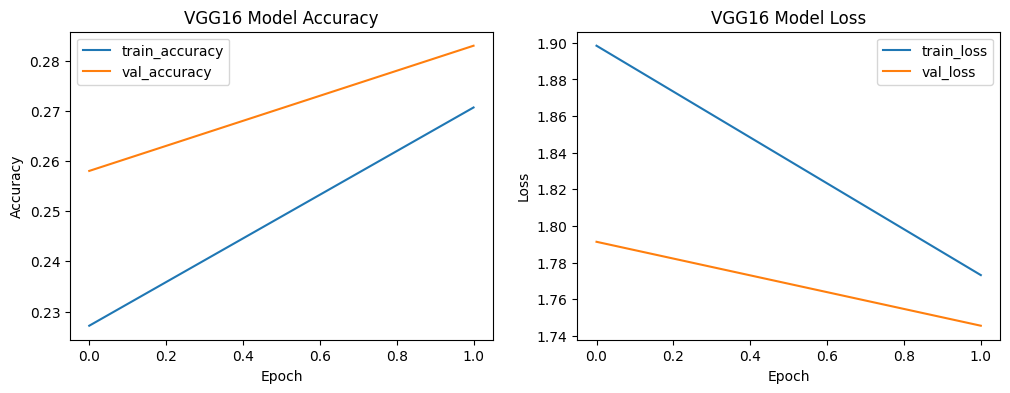

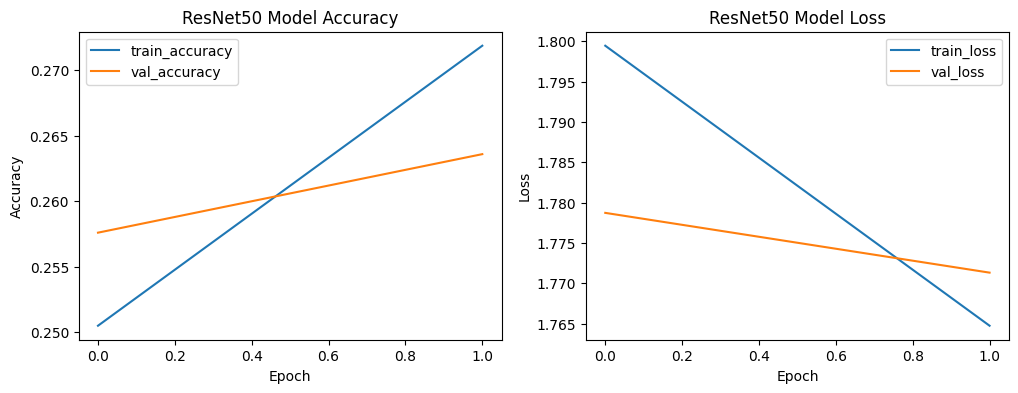

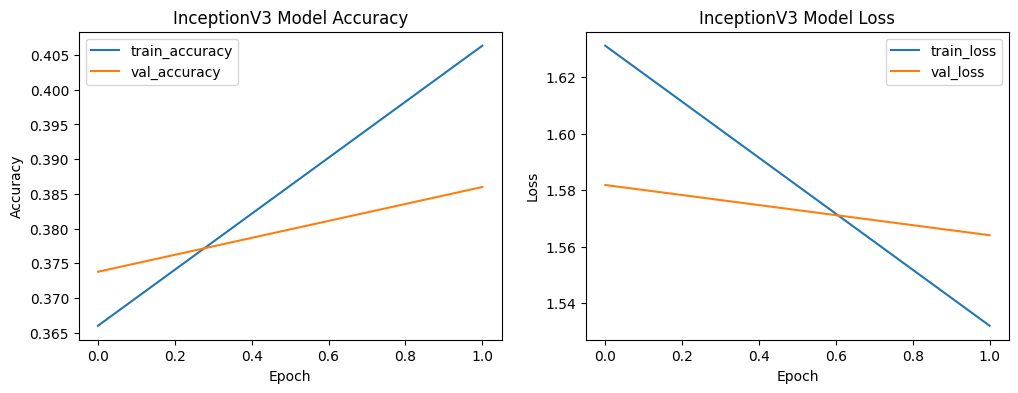

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.title(f'{title} Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(f'{title} Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(vgg16_history, 'VGG16')
plot_history(resnet50_history, 'ResNet50')
plot_history(inceptionv3_history, 'InceptionV3')

In [ ]:
!pip install gradio opencv-python-headless opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.6/318.6 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing in

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import gradio as gr
import tempfile

# Load the saved VGG16 model using the correct path
vgg16_model = tf.keras.models.load_model('/content/vgg16_facial_recognition_model.h5')

# Define class names corresponding to the emotions
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Load Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def preprocess_face(face_img):
    face_img = cv2.resize(face_img, (48, 48))
    face_img = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)
    face_array = image.img_to_array(face_img)
    face_array = np.expand_dims(face_array, axis=0)
    face_array /= 255.0
    return face_array

def predict_emotion(face_img):
    face_array = preprocess_face(face_img)
    predictions = vgg16_model.predict(face_array)
    predicted_class = class_names[np.argmax(predictions)]
    return predicted_class

def process_video(input_video_path):
    # Open the video file
    cap = cv2.VideoCapture(input_video_path)
    output_path = tempfile.mktemp(suffix='.mp4', dir='/tmp')
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Convert to grayscale for face detection
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=3, minSize=(30, 30))

        for (x, y, w, h) in faces:
            # Draw rectangle around the face
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

            # Extract face from frame
            face_img = frame[y:y+h, x:x+w]

            # Predict emotion
            predicted_emotion = predict_emotion(face_img)

            # Display predicted emotion
            cv2.putText(frame, predicted_emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)

        # Write the processed frame to the video file
        out.write(frame)

    # Release resources
    cap.release()
    out.release()

    return output_path

# Define the Gradio interface
def video_interface(video_file):
    output_video_path = process_video(video_file)
    return output_video_path

interface = gr.Interface(
    fn=video_interface,
    inputs=gr.Video(),
    outputs=gr.Video(),
    title="Facial Emotion Recognition in Video",
    description="Upload a video to detect and label facial emotions in real-time."
)

# Launch the Gradio interface
interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://9e536d6ef8afbcd21d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
